# Project Name: House Prices: Advanced Regression Techniques 

### Dataset has been picked up from Kaggle 
### The main aim of this project is to predict the house price based on various features.

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)
df = pd.read_csv(r'C:\Users\singh\anaconda3\datasets\house_price_pred_train.csv.txt')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [137]:
df.shape

(1460, 81)

# EDA

## first we will check for the Nan values

## observing those features having nan values

In [138]:
null_col = [null for null in df.columns if df[null].isnull().sum()>1]
for i in null_col:
    print(i,"has:",(df[i].isnull().mean())*100,"% null values")

LotFrontage has: 17.73972602739726 % null values
Alley has: 93.76712328767123 % null values
MasVnrType has: 0.547945205479452 % null values
MasVnrArea has: 0.547945205479452 % null values
BsmtQual has: 2.5342465753424657 % null values
BsmtCond has: 2.5342465753424657 % null values
BsmtExposure has: 2.6027397260273974 % null values
BsmtFinType1 has: 2.5342465753424657 % null values
BsmtFinType2 has: 2.6027397260273974 % null values
FireplaceQu has: 47.26027397260274 % null values
GarageType has: 5.5479452054794525 % null values
GarageYrBlt has: 5.5479452054794525 % null values
GarageFinish has: 5.5479452054794525 % null values
GarageQual has: 5.5479452054794525 % null values
GarageCond has: 5.5479452054794525 % null values
PoolQC has: 99.52054794520548 % null values
Fence has: 80.75342465753424 % null values
MiscFeature has: 96.30136986301369 % null values


## we can observe that there are many null values therefore checking how is the target variable Sales Price is related to these features

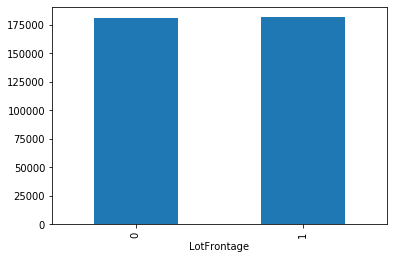

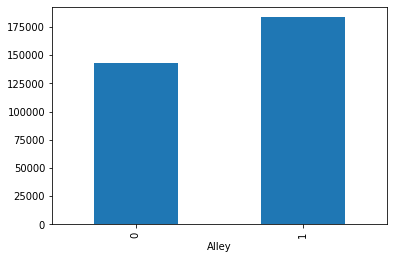

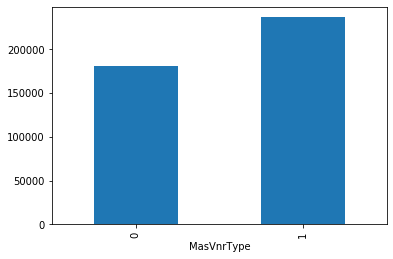

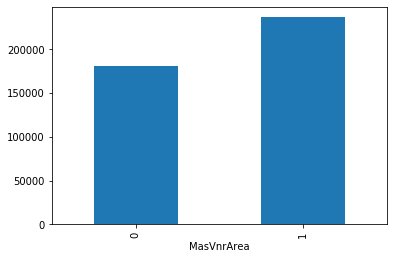

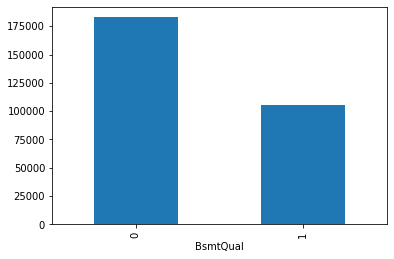

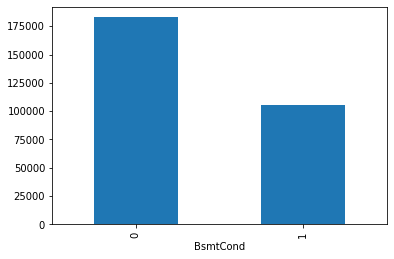

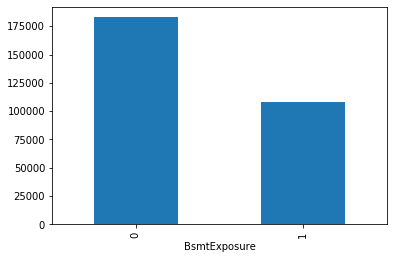

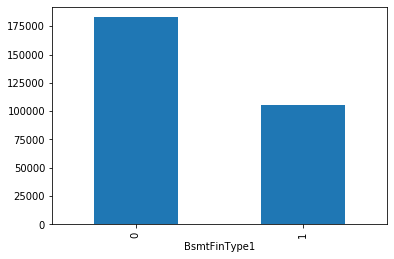

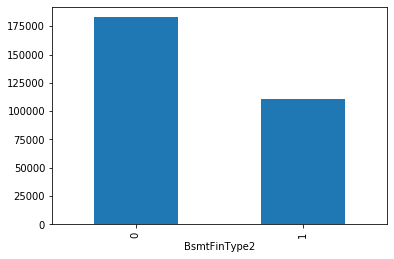

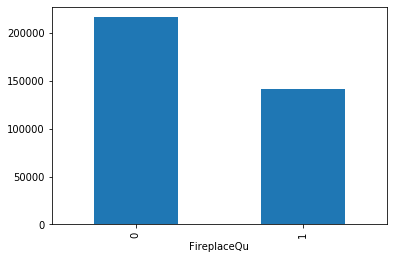

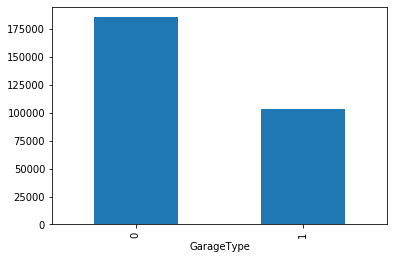

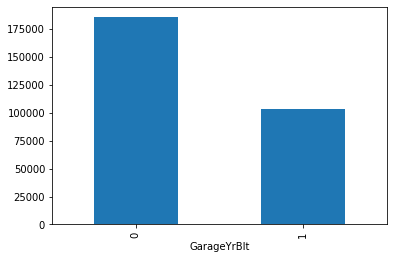

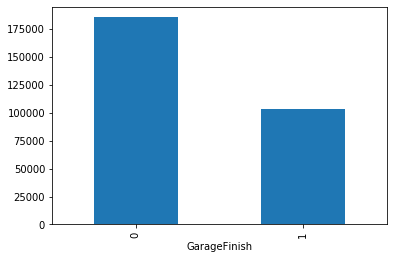

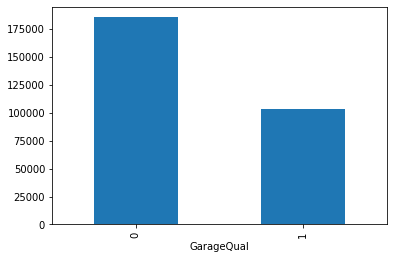

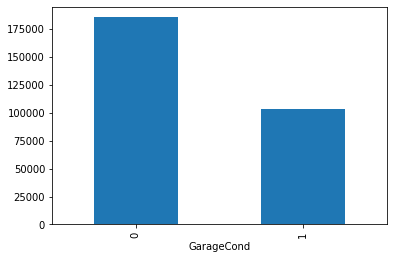

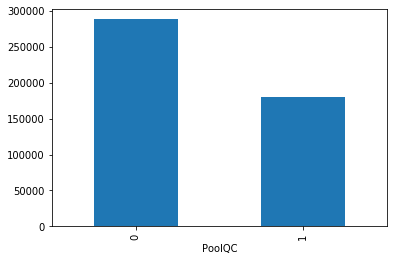

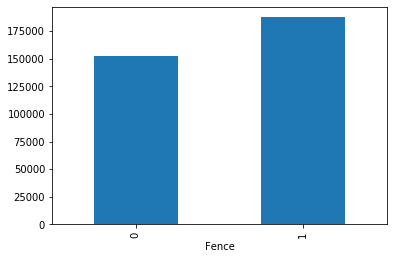

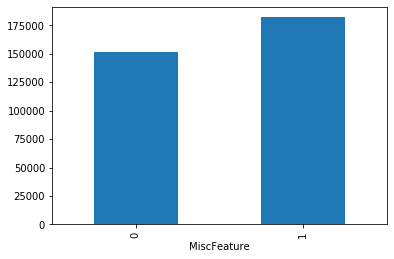

In [139]:
for a in null_col:
    data = df.copy()
    # whereever null value in column assigning it as 1 otherwise 0
    data[a] = np.where(data[a].isnull(),1,0)
    # now grouping on basisof 1 and 0
    data.groupby(a)['SalePrice'].mean().plot.bar()
    plt.show()




here we can observe that SalePrice is related to these nan rows therefore we have to replace it with meaningful data 

## Checking for Numerical variables

In [140]:
num_feat = [f for f in df.columns if df[f].dtype!='O']
print("no. of numerical features:",len(num_feat))
df[num_feat].head()

no. of numerical features: 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


so we have 38 numerical features out of which some time feature variable like 'YrSold'.....checking relation of these feature wr.t to SalePrice

In [141]:
yr_feat = [year for year in num_feat if('Yr' in year or 'Year' in year)]
print(yr_feat)
for i in yr_feat:
    print(i,df[i].unique())

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000.

Text(0, 0.5, 'Sale Price')

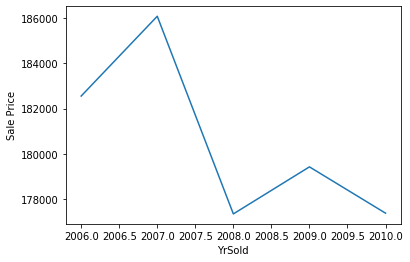

In [142]:
df.groupby('YrSold')['SalePrice'].mean().plot()
plt.ylabel('Sale Price')

we observe that the price fell with year
 now checking with other year features how they affected the Sale Price

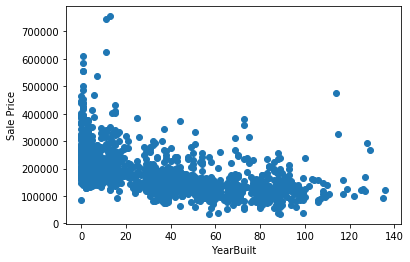

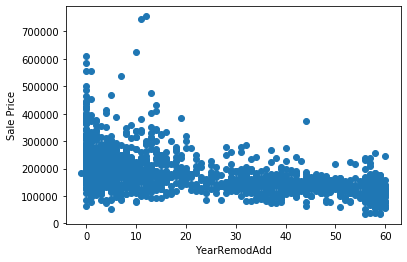

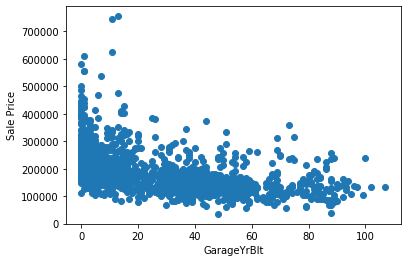

In [143]:
for i in yr_feat:
    data=df.copy()
    if i!='YrSold':
        data[i] = data['YrSold']-data[i]
        plt.scatter(data[i],data['SalePrice'])
        plt.xlabel(i)
        plt.ylabel('Sale Price')
        plt.show()

Checking for other numerical features Discrete and Continous types and not considering 'ID'  feature because it is unique value which won't give any useful information

### for Discrete features

In [144]:

disc_feat = [i for i in num_feat if(df[i].nunique()<25 and i not in yr_feat and i!='Id')]
print("no of discrete features:",len(disc_feat))
print(disc_feat)

no of discrete features: 17
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


finding how the Sale Price is related to these discrete features

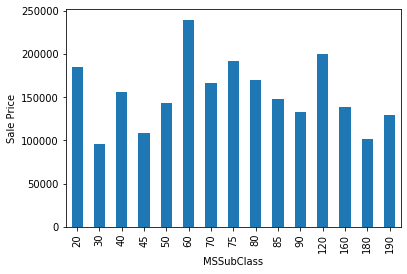

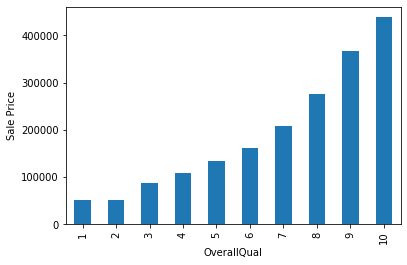

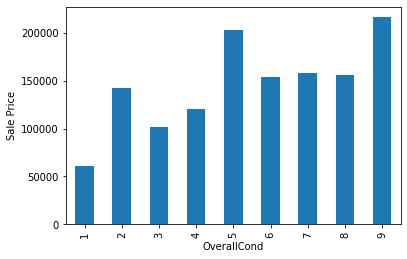

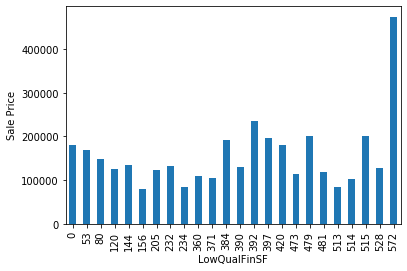

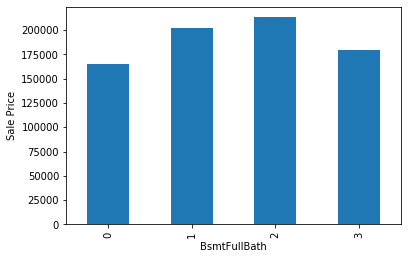

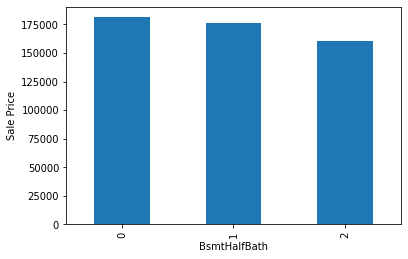

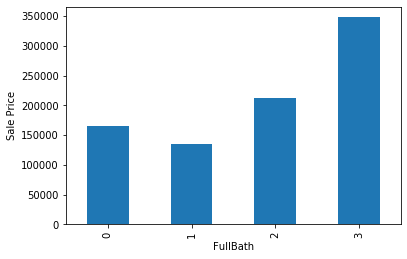

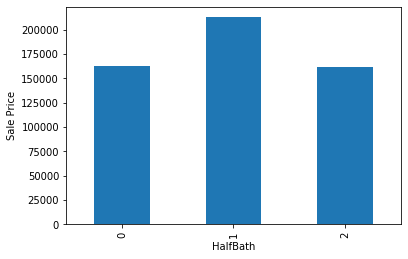

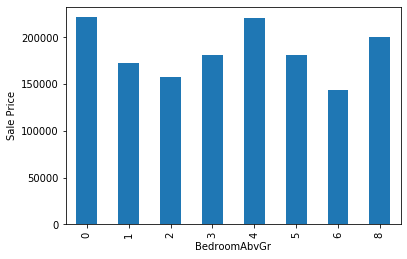

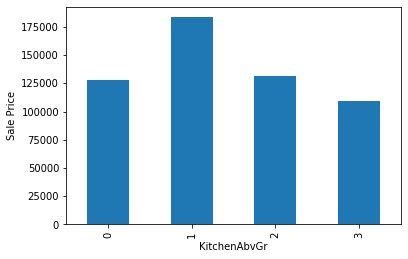

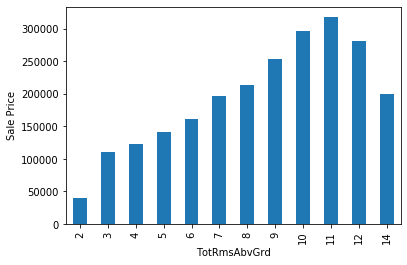

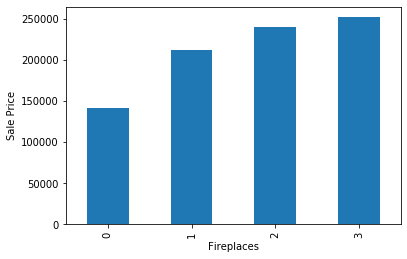

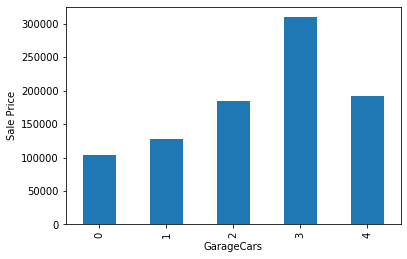

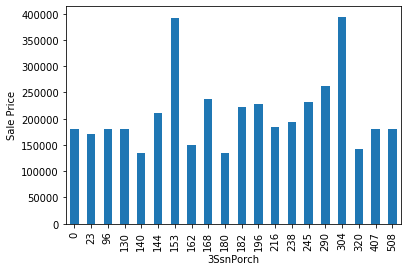

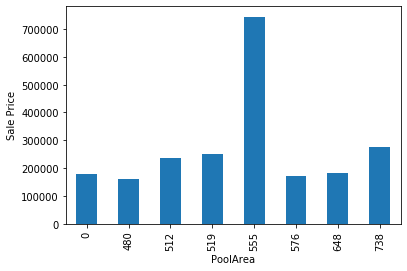

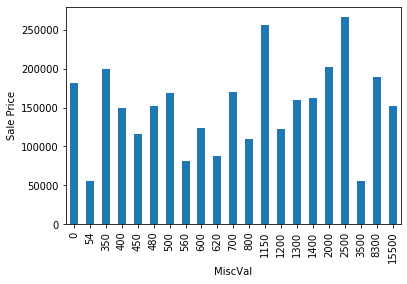

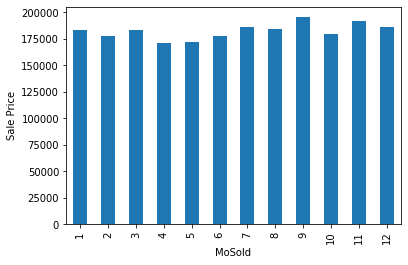

In [145]:
for i in disc_feat:
    df.groupby(i)['SalePrice'].mean().plot.bar()
    plt.ylabel('Sale Price')
    plt.show()

### Continous numerical variables


In [146]:
cont_feat = [i for i in num_feat if (i not in disc_feat+yr_feat) and i!='Id']
print(len(cont_feat))
print(cont_feat)

16
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


Understanding the distribution of continuous variables

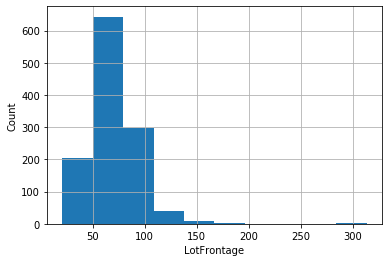

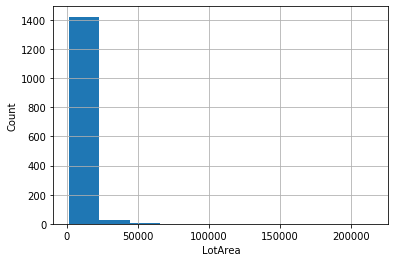

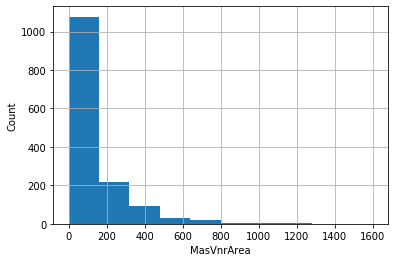

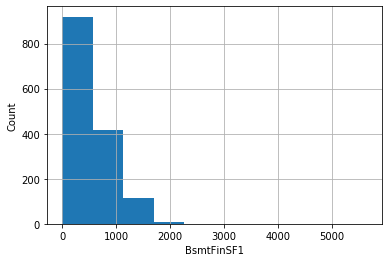

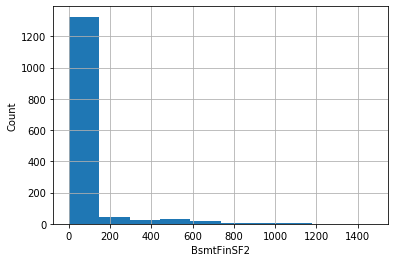

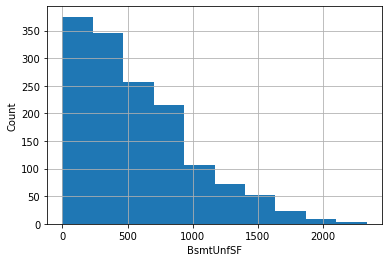

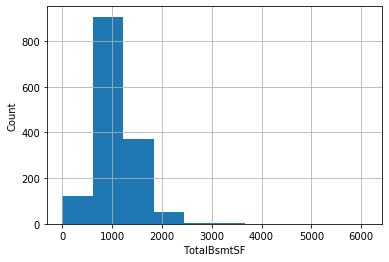

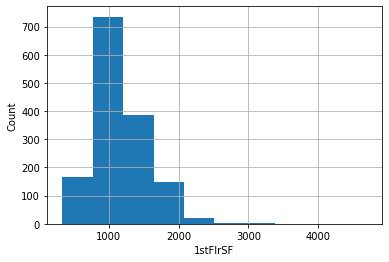

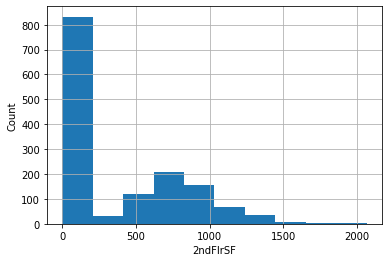

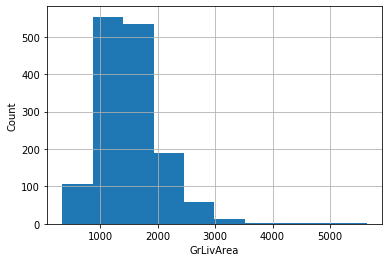

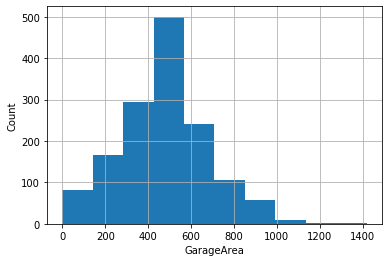

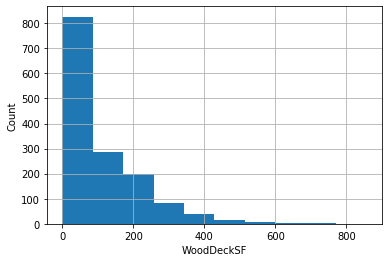

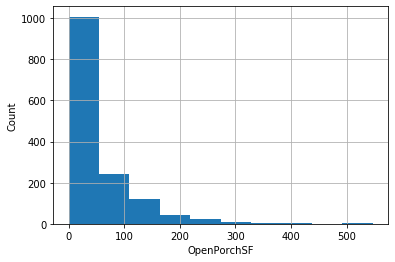

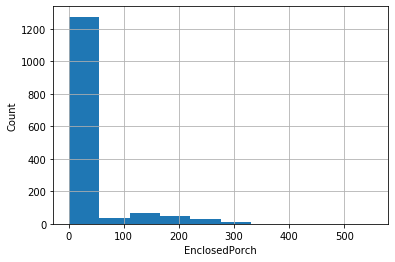

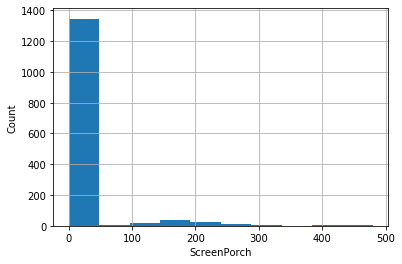

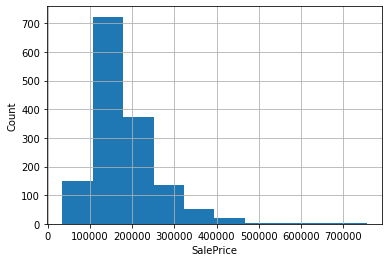

In [147]:
for i in cont_feat:
    df[i].hist()
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

We can see that the data are not normally distirubted therefore applying log normal distribution on data continuous numerical features

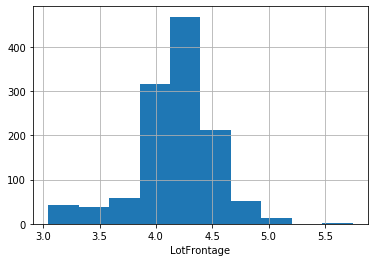

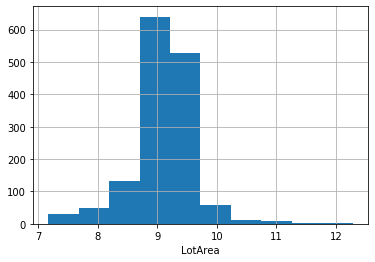

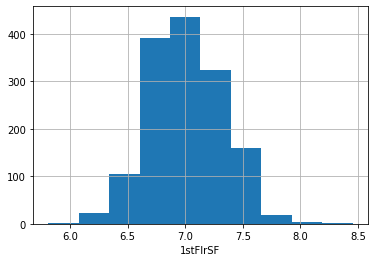

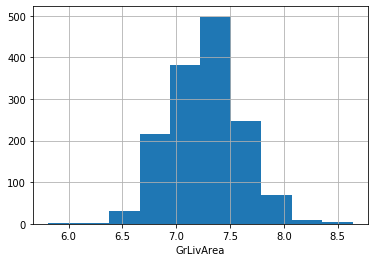

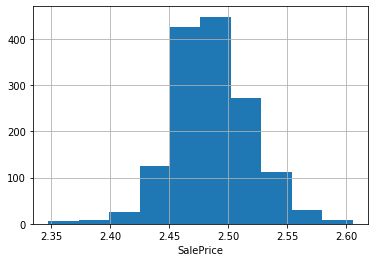

In [148]:
for i in cont_feat:
    data = df.copy()
    if 0 in data[i].unique():
        pass
    else:
        data[i] = np.log(data[i])
        data['SalePrice'] = np.log(data['SalePrice'])
        data[i].hist()
        plt.xlabel(i)
        plt.show()

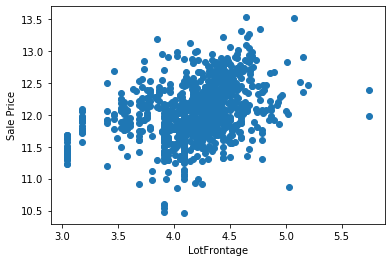

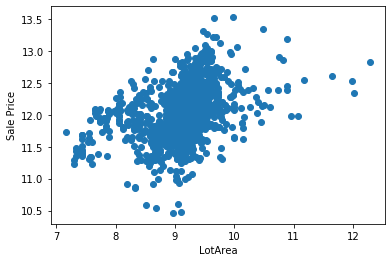

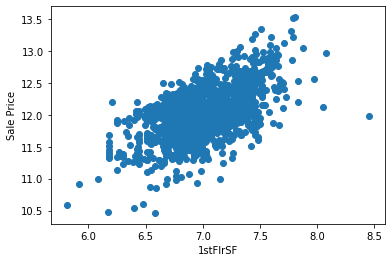

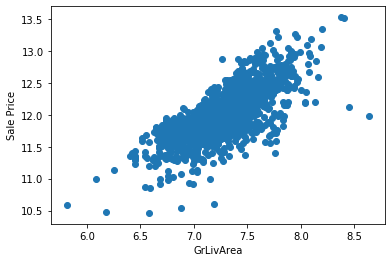

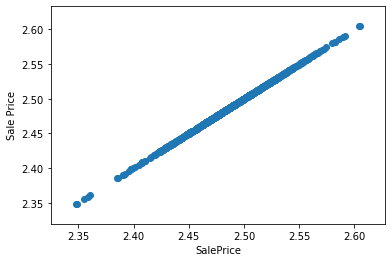

In [149]:
# now we can check the relationship with target variable using scatter graph
for i in cont_feat:
    data = df.copy()
    if 0 in data[i].unique():
        pass    # we cannot apply log transformation for 0 value because log(0) is undefined so we need to pass it
    else:
        data[i] = np.log(data[i])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[i],data['SalePrice'])
        plt.xlabel(i)
        plt.ylabel('Sale Price')
        plt.show()
    

We can observe that in most of the features there is a linear relation with the Sale Price

### Observing Outliers for Numerical features

For Outliers we can use Boxplot from seaborn library or from Dataframe 

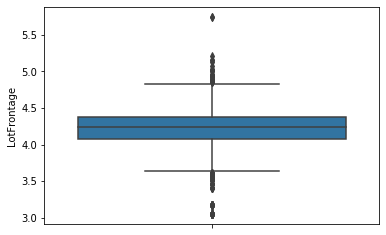

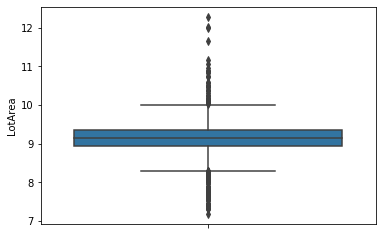

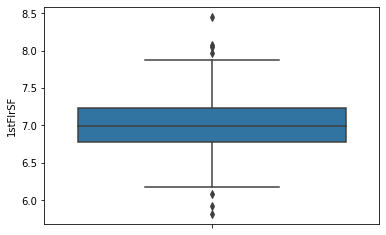

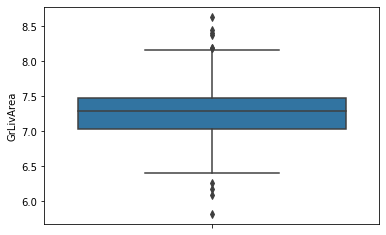

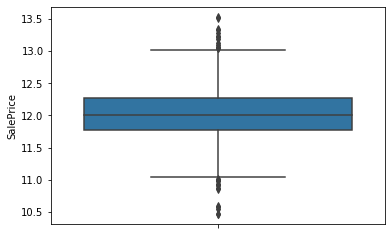

In [150]:
for i in cont_feat:
    data = df.copy()
    if 0 in data[i].unique():
        pass
    else:
        data[i] = np.log(data[i])
        sns.boxplot(data[i],orient='v')
        plt.ylabel(i)
        plt.show()

There are many outliers which we will be dealing during feature engineering

### For Categorical Features

In [151]:
cat_feat = [i for i in df.columns if df[i].dtypes=='O']
print(len(cat_feat))
print(cat_feat)

43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [152]:
# checking which categories has how many sub categories
for i in cat_feat:
    print(i,"category:",df[i].nunique(),"categories")

MSZoning category: 5 categories
Street category: 2 categories
Alley category: 2 categories
LotShape category: 4 categories
LandContour category: 4 categories
Utilities category: 2 categories
LotConfig category: 5 categories
LandSlope category: 3 categories
Neighborhood category: 25 categories
Condition1 category: 9 categories
Condition2 category: 8 categories
BldgType category: 5 categories
HouseStyle category: 8 categories
RoofStyle category: 6 categories
RoofMatl category: 8 categories
Exterior1st category: 15 categories
Exterior2nd category: 16 categories
MasVnrType category: 4 categories
ExterQual category: 4 categories
ExterCond category: 5 categories
Foundation category: 6 categories
BsmtQual category: 4 categories
BsmtCond category: 4 categories
BsmtExposure category: 4 categories
BsmtFinType1 category: 6 categories
BsmtFinType2 category: 6 categories
Heating category: 6 categories
HeatingQC category: 5 categories
CentralAir category: 2 categories
Electrical category: 5 categori

Neighborhood, Exterior1st, Exterior2nd etc has many features which would be difficult while One Hot Encoding therefore need to take care of that 

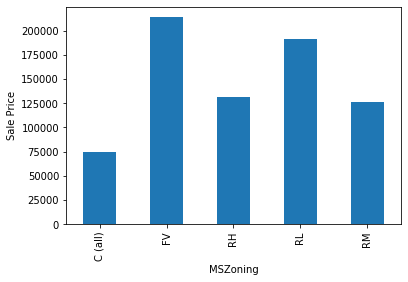

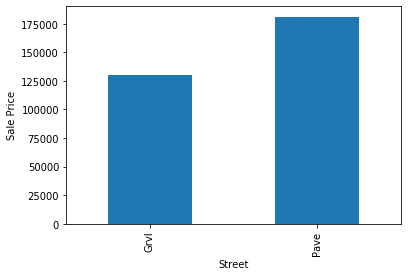

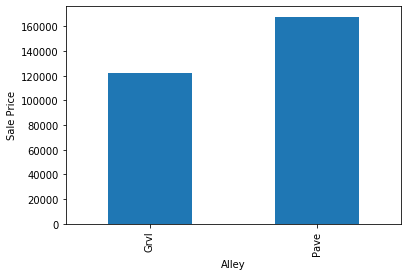

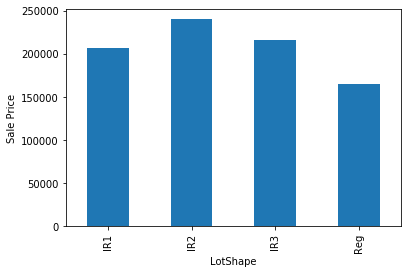

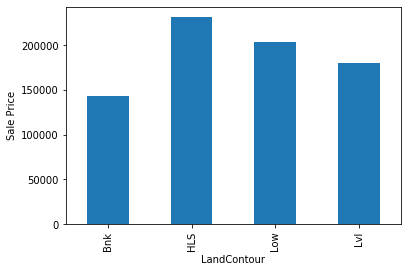

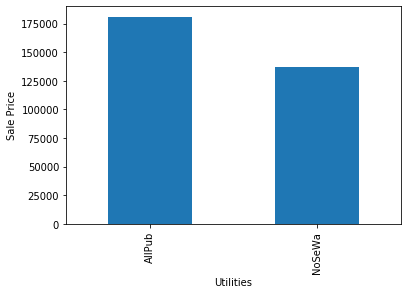

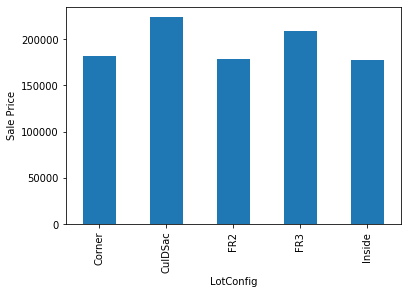

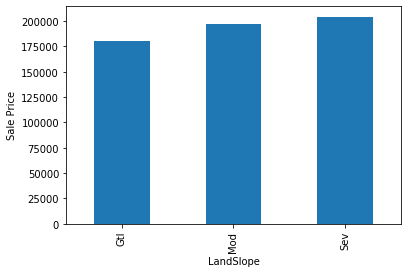

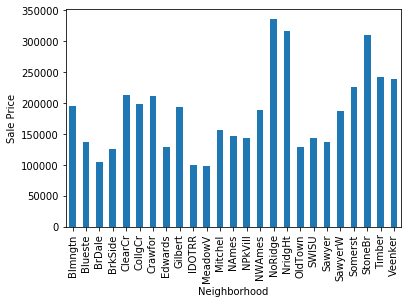

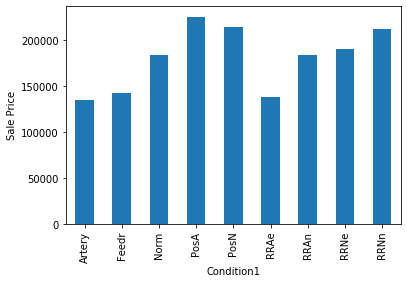

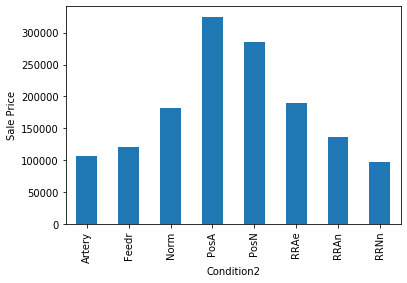

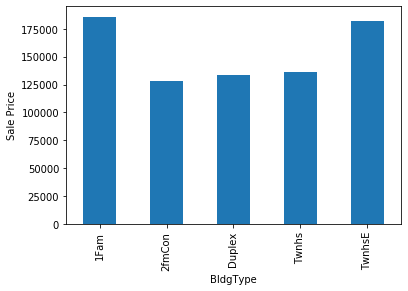

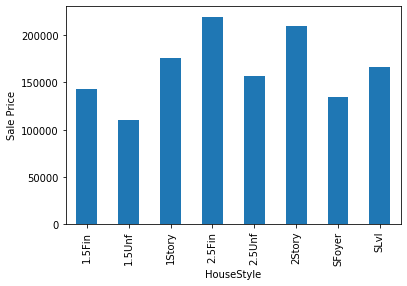

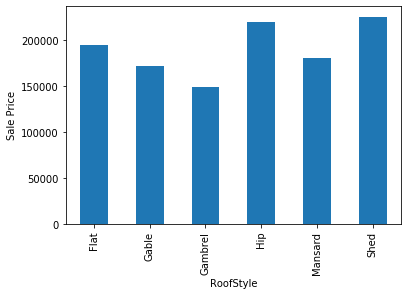

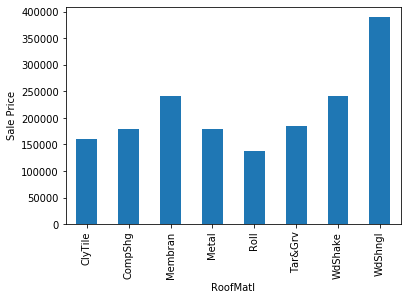

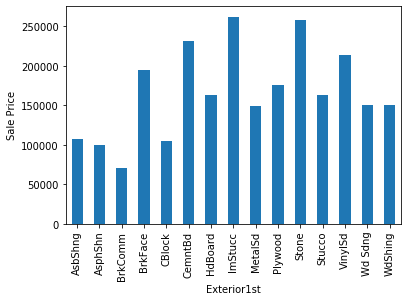

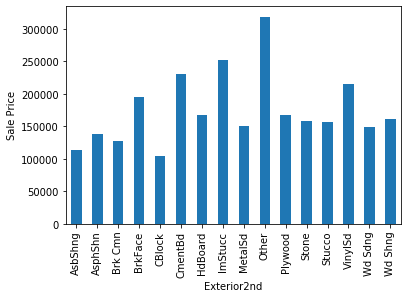

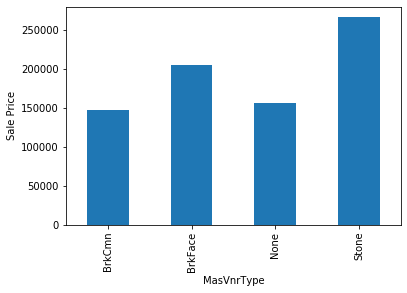

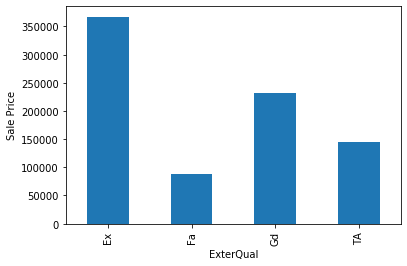

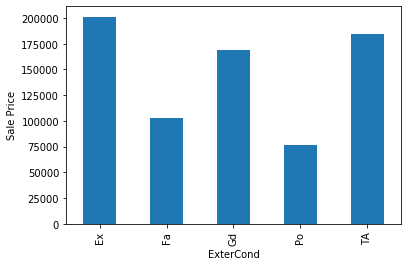

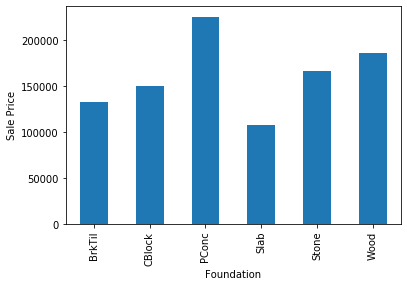

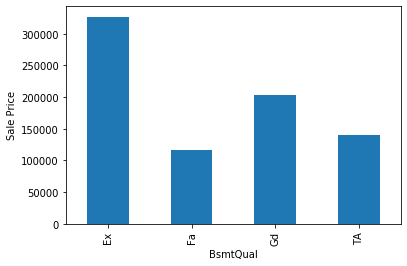

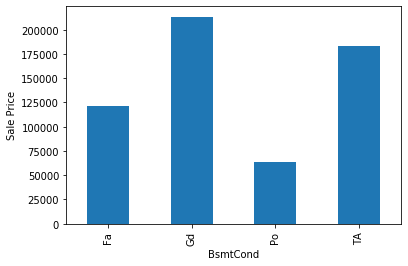

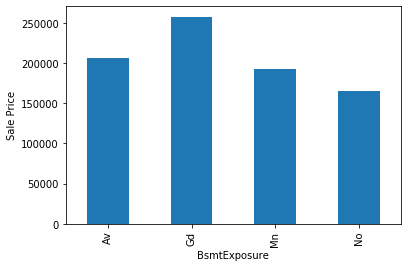

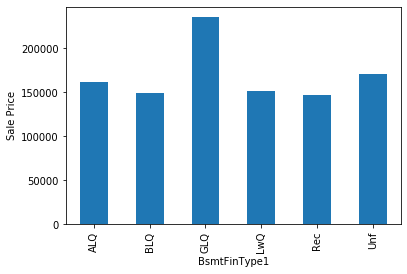

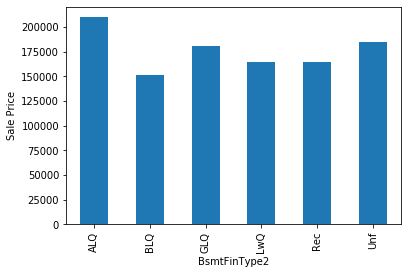

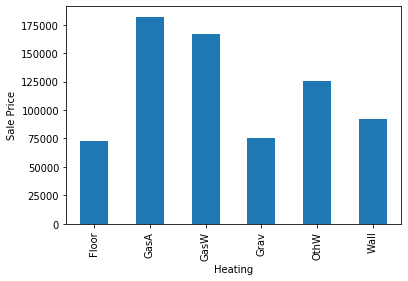

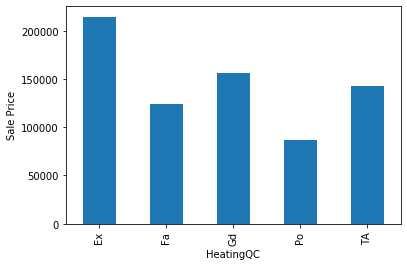

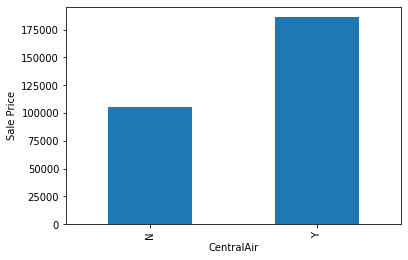

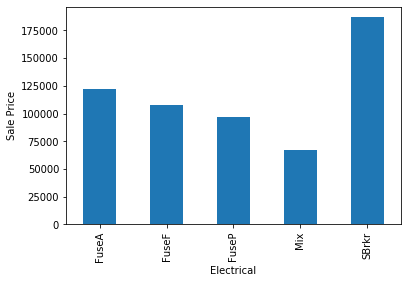

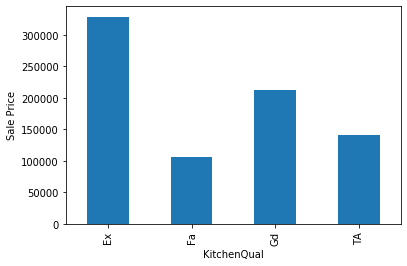

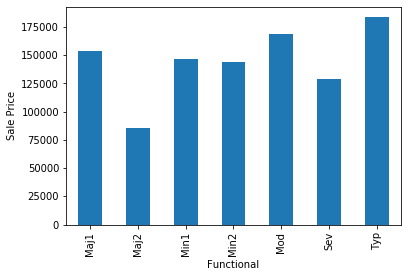

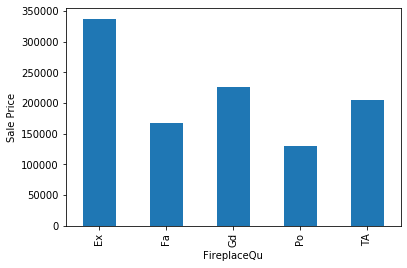

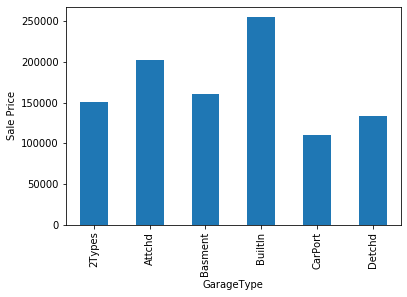

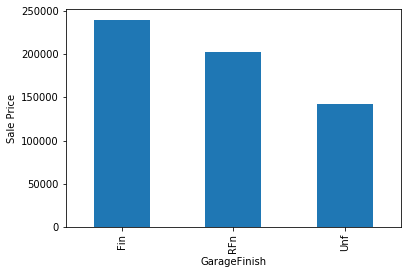

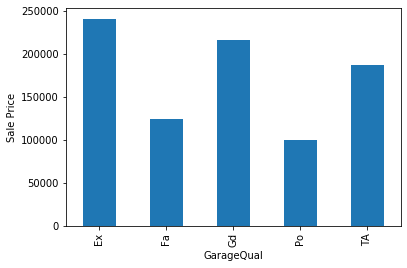

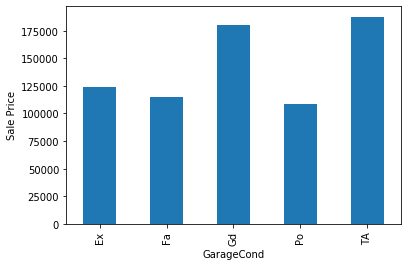

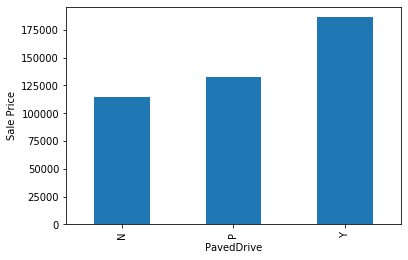

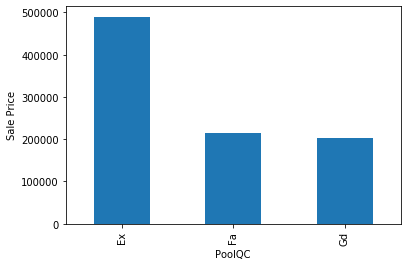

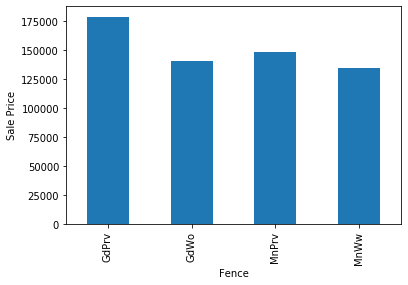

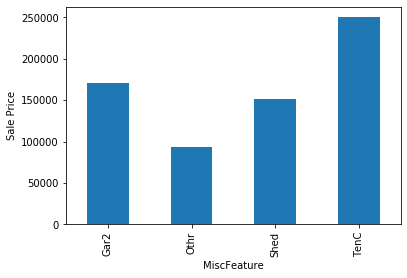

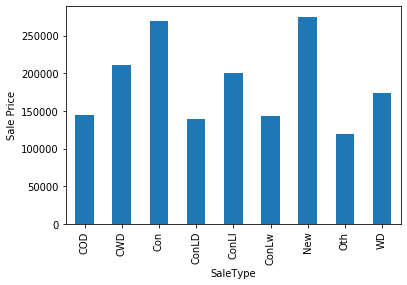

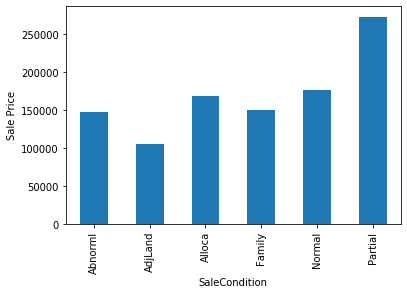

In [153]:
# Checking relationship of categorical features with target variable
for i in cat_feat:
    data = df.copy()
    data.groupby(i)['SalePrice'].mean().plot.bar()
    plt.ylabel('Sale Price')
    plt.show()

# Feature Engineering

First capturing the Nan values of categorical feature and handling it

In [154]:
cat_feat_nan = [i for i in cat_feat if df[i].isnull().sum()>1]
for i in cat_feat_nan:
    print(i,"has",(df[i].isnull().mean())*100,"% nan values")

Alley has 93.76712328767123 % nan values
MasVnrType has 0.547945205479452 % nan values
BsmtQual has 2.5342465753424657 % nan values
BsmtCond has 2.5342465753424657 % nan values
BsmtExposure has 2.6027397260273974 % nan values
BsmtFinType1 has 2.5342465753424657 % nan values
BsmtFinType2 has 2.6027397260273974 % nan values
FireplaceQu has 47.26027397260274 % nan values
GarageType has 5.5479452054794525 % nan values
GarageFinish has 5.5479452054794525 % nan values
GarageQual has 5.5479452054794525 % nan values
GarageCond has 5.5479452054794525 % nan values
PoolQC has 99.52054794520548 % nan values
Fence has 80.75342465753424 % nan values
MiscFeature has 96.30136986301369 % nan values


In [158]:
# Handling Nan values of categorical feature by labelling them as "Missing"
def replace_cat_na(df,cat_feat_nan):
    data = df.copy()
    data[cat_feat_nan] = data[cat_feat_nan].fillna("Missing")
    return data
df = replace_cat_na(df,cat_feat_nan)

In [161]:
df[cat_feat_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

Now capturing Nan values for numerical values

In [167]:
num_feat_nan = [i for i in num_feat if df[i].isnull().sum()>1]
for i in num_feat_nan:
    print(i,"contains",df[i].isnull().mean()*100,"% missing values")

LotFrontage contains 17.73972602739726 % missing values
MasVnrArea contains 0.547945205479452 % missing values
GarageYrBlt contains 5.5479452054794525 % missing values


We need to replace the Nan values either with median or mode because as we observed earlier that there were many outliers

In [168]:
for i in num_feat_nan:
    df[i+"_nan"] = np.where(df[i].isnull(),1,0)   #where there would have been a null value assign 1 there
    df[i] = df[i].fillna(df[i].median())

In [169]:
df[num_feat_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [173]:
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,Missing,

Now for Date time variable features instead of which year we will replace it with number of years before sold

In [175]:
for i in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    df[i] = df['YrSold']-df[i]

In [179]:
df[yr_feat].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


converting the numerical features into log transformed daat since the data was skewed

In [180]:
for i in ['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice']:
    df[i] = np.log(df[i])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


## Handling the Rare Categorical feature in which features with sub-categories consists of only 1% or less data

In [229]:
for i in cat_feat:
    temp = df[i].value_counts()/len(df)     # determine % of each subcategory
    index = temp[temp<0.01].index           # determining the subcategories less than 1%
    df[i] = np.where(df[i].isin(index),"Rare",df[i])  # replacing those subcategories with label "Rare"

In [244]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if isinstance(df[i][0],str):
        df[i] = le.fit_transform(df[i])

In [245]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,2,4.174387,9.041922,0,1,3,3,0,3,0,4,2,0,0,2,7,5,5,5,0,0,8,8,1,196.0,1,3,2,2,4,4,2,706,6,0,150,856,0,0,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,3,0,5.0,2,2,548,3,3,2,0,61,0,0,0,0,0,2,0,0,2,2008,3,2,12.247694,0,0,0
1,2,20,2,4.382027,9.169518,0,1,3,3,0,2,0,16,1,0,0,1,6,8,31,31,0,0,4,4,2,0.0,3,3,1,2,4,1,0,978,6,0,284,1262,0,0,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,3,6,4,1,5,0,31.0,2,2,460,3,3,2,298,0,0,0,0,0,0,2,0,0,5,2007,3,2,12.109011,0,0,0
2,3,60,2,4.219508,9.328123,0,1,0,3,0,3,0,4,2,0,0,2,7,5,7,6,0,0,8,8,1,162.0,1,3,2,2,4,3,2,486,6,0,434,920,0,0,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,5,0,7.0,2,2,608,3,3,2,0,42,0,0,0,0,0,2,0,0,9,2008,3,2,12.317167,0,0,0
3,4,70,2,4.094345,9.164296,0,1,0,3,0,0,0,5,2,0,0,2,7,5,91,36,0,0,9,10,2,0.0,3,3,0,4,1,4,0,216,6,0,540,756,0,2,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,2,3,8.0,3,3,642,3,3,2,0,35,272,0,0,0,0,2,0,0,2,2006,3,0,11.849398,0,0,0
4,5,60,2,4.430817,9.565214,0,1,0,3,0,2,0,13,2,0,0,2,8,5,8,8,0,0,8,8,1,350.0,1,3,2,2,4,0,2,655,6,0,490,1145,0,0,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,5,0,8.0,2,3,836,3,3,2,192,84,0,0,0,0,0,2,0,0,12,2008,3,2,12.429216,0,0,0
5,6,50,2,4.442651,9.554993,0,1,0,3,0,3,0,10,2,0,0,0,5,5,16,14,0,0,8,8,2,0.0,3,3,3,2,4,4,2,732,6,0,64,796,0,0,1,3,6.679599,566,0,7.216709,1,0,1,1,1,1,3,5,4,0,3,0,16.0,3,2,480,3,3,2,40,30,0,320,0,0,0,3,2,700,10,2009,3,2,11.870600,0,0,0
6,7,20,2,4.317488,9.218705,0,1,3,3,0,3,0,20,2,0,0,1,8,5,3,2,0,0,8,8,4,186.0,1,3,2,0,4,0,2,1369,6,0,317,1686,0,0,1,3,7.434848,0,0,7.434848,1,0,2,0,3,1,2,7,4,1,2,0,3.0,2,2,636,3,3,2,255,57,0,0,0,0,0,2,0,0,8,2007,3,2,12.634603,0,0,0
7,8,60,2,4.234107,9.247829,0,1,0,3,0,0,0,12,3,0,0,2,7,6,36,36,0,0,3,3,4,240.0,3,3,1,2,4,3,0,859,1,32,216,1107,0,0,1,3,7.009409,983,0,7.644919,1,0,2,1,3,1,3,7,4,2,5,0,36.0,2,2,484,3,3,2,235,204,228,0,0,0,0,2,2,350,11,2009,3,2,12.206073,1,0,0
8,9,50,3,3.931826,8.719317,0,1,3,3,0,3,0,15,0,0,0,0,7,5,77,58,0,0,1,10,2,0.0,3,3,0,4,4,4,6,0,6,0,952,952,0,2,1,1,6.929517,752,0,7.480992,0,0,2,0,2,2,3,8,0,2,5,3,77.0,3,2,468,0,3,2,90,0,205,0,0,0,0,2,0,0,4,2008,3,0,11.774520,0,0,0
9,10,190,2,3.912023,8.911934,0,1,3,3,0,0,0,2,0,1,1,3,5,6,69,58,0,0,4,4,2,0.0,3,3,0,4,4,4,2,851,6,0,140,991,0,0,1,3,6.981935,0,0,6.981935,1,0,1,0,2,2,3,5,4,2,5,0,69.0,2,1,205,2,3,2,0,4,0,0,0,0,0,2,0,0,1,2008,3,2,11.678440,0,0,0


## Feature Scaling

In [250]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature = [i for i in df.columns if i not in ['Id','SalePrice']]
df[feature] = scaler.fit_transform(df[feature])

In [251]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,0.235294,0.5,0.418208,0.366344,0.0,0.5,1.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.036765,0.098361,0.0,0.0,0.8,0.8,0.25,0.12250,0.333333,1.0,0.50,0.5,1.00,1.00,0.333333,0.125089,1.0,0.0,0.064212,0.140098,0.0,0.0,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.6,0.0,0.046729,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.090909,0.50,1.0,0.5,12.247694,0.0,0.0,0.0
1,2,0.000000,0.5,0.495064,0.391317,0.0,0.5,1.0,1.0,0.0,0.50,0.0,0.727273,0.2,0.0,0.0,0.2,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.4,0.50,0.00000,1.000000,1.0,0.25,0.5,1.00,0.25,0.000000,0.173281,1.0,0.0,0.121575,0.206547,0.0,0.0,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,1.0,0.0,0.289720,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.363636,0.25,1.0,0.5,12.109011,0.0,0.0,0.0
2,3,0.235294,0.5,0.434909,0.422359,0.0,0.5,0.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.051471,0.114754,0.0,0.0,0.8,0.8,0.25,0.10125,0.333333,1.0,0.50,0.5,1.00,0.75,0.333333,0.086109,1.0,0.0,0.185788,0.150573,0.0,0.0,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,1.0,0.0,0.065421,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.727273,0.50,1.0,0.5,12.317167,0.0,0.0,0.0
3,4,0.294118,0.5,0.388581,0.390295,0.0,0.5,0.0,1.0,0.0,0.00,0.0,0.227273,0.4,0.0,0.0,0.4,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.9,1.0,0.50,0.00000,1.000000,1.0,0.00,1.0,0.25,1.00,0.000000,0.038271,1.0,0.0,0.231164,0.123732,0.0,0.5,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.4,0.6,0.074766,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.090909,0.00,1.0,0.0,11.849398,0.0,0.0,0.0
4,5,0.235294,0.5,0.513123,0.468761,0.0,0.5,0.0,1.0,0.0,0.50,0.0,0.590909,0.4,0.0,0.0,0.4,0.777778,0.500,0.058824,0.147541,0.0,0.0,0.8,0.8,0.25,0.21875,0.333333,1.0,0.50,0.5,1.00,0.00,0.333333,0.116052,1.0,0.0,0.209760,0.187398,0.0,0.0,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,1.0,0.0,0.074766,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,1.000000,0.50,1.0,0.5,12.429216,0.0,0.0,0.0


## Feature Selection using Lasso and SelectFromModel

In [254]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
x_train = df.drop(['SalePrice','Id'],axis=1)
y_train = df['SalePrice']

In [262]:
model = SelectFromModel(Lasso(alpha=0.005,random_state=1)) # bigger the alpha less feature will be selected
model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=1,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [264]:
model.get_support()

array([False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [270]:
print("Total no of feature:",x_train.shape[1])
print("selected no of features are:",len(x_train.columns[model.get_support()]))

Total no of feature: 82
selected no of features are: 20


In [277]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
lasso = Lasso()
params = {'alpha':[1e-10,1e-8,1e-5,0.001,0.01,1,5,10,15,20,50,100,200]}
reg = GridSearchCV(lasso,params,cv=5,scoring='neg_mean_squared_error')


In [278]:
reg.fit(x,y)
print(reg.best_params_)
print(reg.best_score_)

C:\Users\singh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5236446709786264, tolerance: 0.01891283972369289
  positive)
C:\Users\singh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.719111805655885, tolerance: 0.018002422128285206
  positive)
C:\Users\singh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.060575359350664826, tolerance: 0.01837384809099904
  positive)
C:\Users\singh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

{'alpha': 0.001}
-0.01903021343613475
